In [4]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Gender : Gender of the patient

Sides effects : Side effects of the drug
    
Drug name : Name of the drug

In [5]:
#load the dataset into a variable named data
data=pd.read_csv("DRUG BATCH SIDE EFFECTS DATASET 0.1.csv")

In [6]:
#checking the data head
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [7]:
#checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


Insight:
The info() method will give summary of the dataset. We can know the basic information about the dataset including the type of columns, non-null values and memory usage. This dataset contains 5 categorical variables and 1 integer variables.

In [8]:
#checking the data shape
data.shape

(400000, 6)

Insight:
The dataset contains 400000 rows and 6 columns.

In [9]:
#checking the data describe
data.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


Insight:
Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.

In [10]:
data.dtypes

NAME             object
GENDER           object
DRUG NAME        object
AGE             float64
RACE             object
SIDE EFFECTS     object
dtype: object

In [11]:
#checking is there any null values
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

Inference
There are missing values in the AGE.

In [12]:
# for each column
for c in list(data.columns):
    #  get a list of unique values
    n=data[c].unique()
    # if the number of unique values is less than 30 print values ,otherwise print the number of unoque values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c+':'+str(len(n))+'unique values')
    

NAME:133911unique values
GENDER
['M' 'F']
DRUG NAME:502unique values
AGE:81unique values
RACE
['White' 'Hispanic, White' 'Unknown' 'Black' 'Other' 'Hispanic, Black'
 'Asian, Other' 'Asian Indian' 'Chinese']
SIDE EFFECTS
['Mild Side Effects' 'Extremely Severe Side Effects' 'Severe Side Effects'
 'No Side Effects' 'Moderate Side Effects']


Insight:
'Sex' has two categories.

 Nine  different 'races' are present.

'Drug' has 502  variety.

'Age ' has 81 unique values

five different 'side effects'. 

In [13]:
data.duplicated().sum()

1792

In [14]:
# dropping duplicate values
data.drop_duplicates(keep=False, inplace=True)

In [15]:
data.duplicated().sum()

0

# EDA (Exploratory data analysis)¶

# RACE

In [16]:
data['RACE'].value_counts()

White              311281
Hispanic, White     43669
Black               35544
Unknown              3018
Hispanic, Black      1643
Other                 994
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64

In [17]:
mapped_race={"Unknown":"Other"}

In [18]:
data['RACE']=data['RACE'].replace(mapped_race)

In [19]:
data['RACE'].unique()

array(['White', 'Hispanic, White', 'Other', 'Black', 'Hispanic, Black',
       'Asian, Other', 'Asian Indian', 'Chinese'], dtype=object)

Inference


According to the value counts of "RACE", white categorized peoples are taken the most drugs consuming for their treatments and the chinese are the least.
Mapped the other to unknown category

<AxesSubplot:ylabel='RACE'>

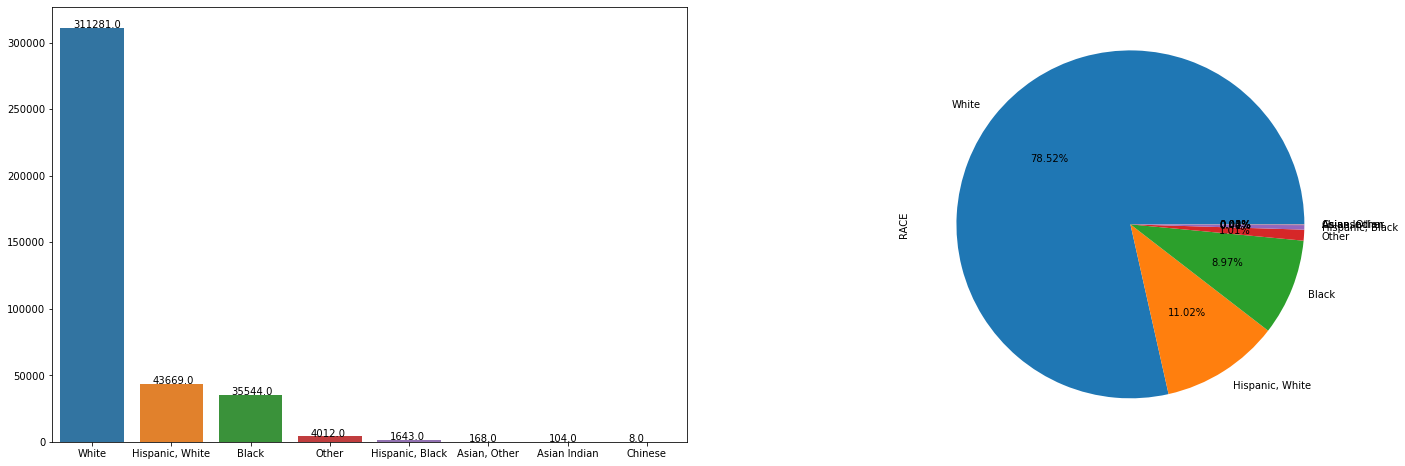

In [20]:
fig,axes = plt.subplots(1,2, figsize = (25,8))
plot = sns.barplot(data=data, x=data['RACE'].value_counts().index, y = data['RACE'].value_counts().values, ax = axes[0])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/5, p.get_height()+100))
data['RACE'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', ax = axes[1])

# GENDER

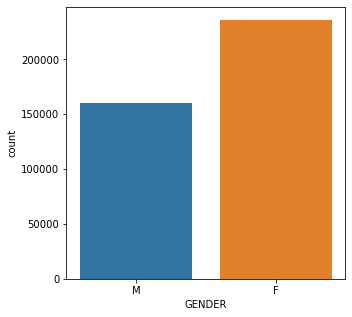

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data['GENDER'])
plt.show()

Inference


from the Gender count we can see that  Females are much more than males in this dataset

# DRUG NAME

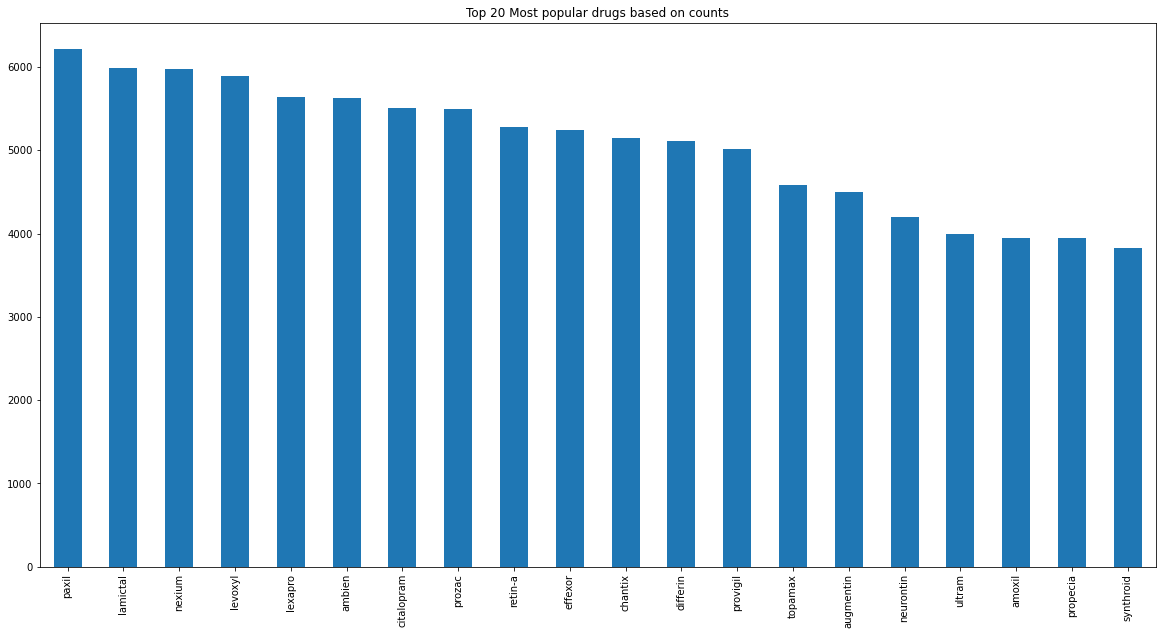

In [22]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(20,10))
data['DRUG NAME'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [23]:
data['DRUG NAME'].value_counts()

paxil         6217
lamictal      5986
nexium        5973
levoxyl       5896
lexapro       5643
              ... 
lantus           8
periostat        8
proair-hfa       8
bactrim-ds       8
arimidex         8
Name: DRUG NAME, Length: 502, dtype: int64

paxil is the most used drug 

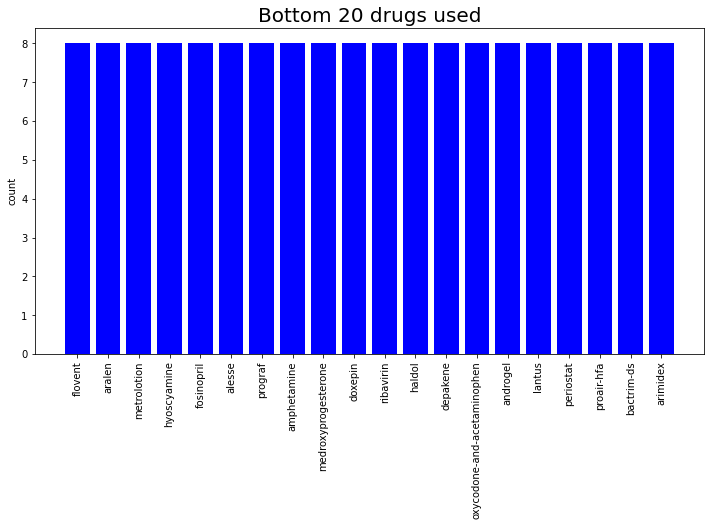

In [24]:
#plot a bargraph to check bottom 20 drugs used
plt.figure(figsize=(12,6))
drug_bottom=data['DRUG NAME'].value_counts(ascending = False).tail(20)

plt.bar(drug_bottom.index,drug_bottom.values,color='blue')
plt.title('Bottom 20 drugs used',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

The above being interpretation of the generic data, in line with the objective of project, will move ahead selecting a particular drug Topamax, one featuring in the top 20.



Conditions - Topamax

Text(0, 0.5, 'Count')

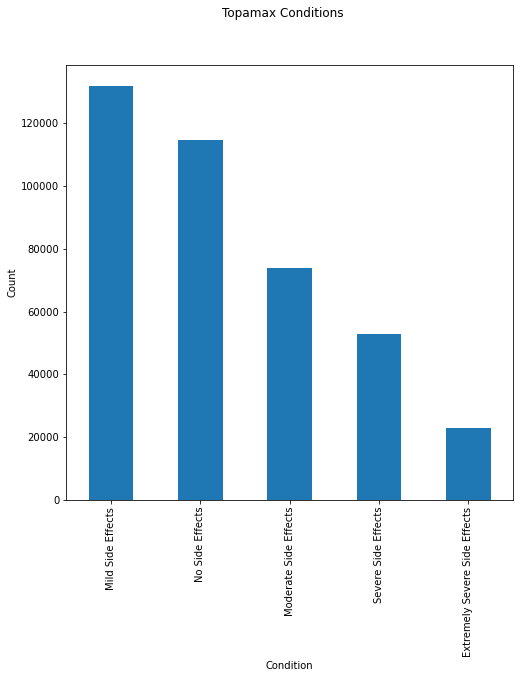

In [25]:
data['SIDE EFFECTS'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Topamax Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

# AGE

# Usage of drugs with respect to age

In [26]:
#filling the missing values in age with respect to the median of it.
data["AGE"]=data["AGE"].fillna(data["AGE"].median())
data.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

# Checking for outliers

<AxesSubplot:xlabel='AGE'>

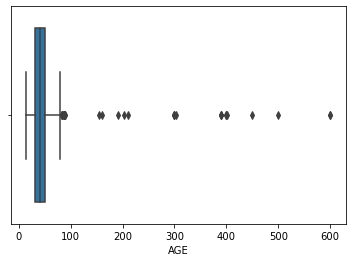

In [27]:
sns.boxplot(data['AGE'])


In [28]:
# Calculate quartile values for 'AGE' using 30,60 and 90 percentile values
Q1=np.percentile(data["AGE"],30,interpolation= "midpoint")
Q2=np.percentile(data["AGE"],60,interpolation= "midpoint")
Q3=np.percentile(data["AGE"],90,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)


value of Q1: 34.0
value of Q2: 45.0
value of Q3: 57.0


In [29]:
data["AGE"].median()

41.0

In [30]:
IQR= Q3-Q1
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 91.5
Lower limit value is: -0.5


In [31]:
outlier=[]
for x in data["AGE"]:
    if((x>Upper_lim)or(x<Lower_lim)):
        outlier.append(x)

In [32]:
outlier

[300.0,
 302.0,
 500.0,
 400.0,
 203.0,
 160.0,
 400.0,
 191.0,
 450.0,
 390.0,
 155.0,
 300.0,
 390.0,
 600.0,
 211.0,
 600.0,
 401.0,
 300.0,
 390.0]

In [33]:
ind_val=data["AGE"]>Upper_lim
data.loc[ind_val].index

Int64Index([  3008,  41048,  66169,  85047, 111850, 119574, 127240, 171643,
            174039, 174487, 224733, 232518, 264849, 290165, 325631, 333669,
            337790, 384352, 393820],
           dtype='int64')

In [34]:
data.drop([ 3008,  41048,  66169,  85047, 111850, 119574, 127240, 171643,
            174039, 174487, 224733, 232518, 264849, 290165, 325631, 333669,
            337790, 384352, 393820],inplace=True)


# Inference

In this case we're taking quartile values for 'AGE' using 30,60 and 90 percentile values Because according to the age logically maximum life expactancy is about 80-90 years in rare case it's upto 102-110.so we conclude to detect the outliers above 110 and droping for the better accuracy in model. 

<AxesSubplot:xlabel='AGE'>

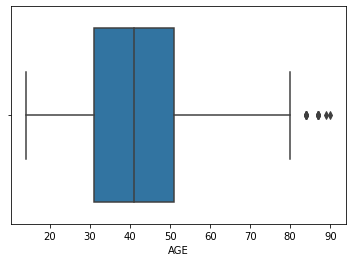

In [35]:
sns.boxplot(data['AGE'])

In [36]:
data['AGE'] = data['AGE'].astype(int)

Changing the age to int value

In [37]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41,White,Mild Side Effects
1,Aaban,M,zocor,53,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31,White,Mild Side Effects
3,Aabha,F,voltaren,44,White,Severe Side Effects
4,Aabid,M,tramadol,24,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50,White,Severe Side Effects
399996,TRUE,M,klaron,55,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57,Other,Severe Side Effects
399998,TRUE,F,zoloft,59,White,No Side Effects


In [38]:
category=pd.cut(data.AGE,bins=[0,3,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])

In [39]:
data.insert(5,'AGE CATEGORY',category)

Added a new column 'Age Category' to the dataframe which categorises 0-2 years as 'Toddler/Baby',3-16 years as 'Child',
17-64 years as 'Adult',66-99 years as 'Elderly'

In [40]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,AGE CATEGORY,SIDE EFFECTS
0,Aaban,M,topamax,41,White,Adult,Mild Side Effects
1,Aaban,M,zocor,53,"Hispanic, White",Adult,Extremely Severe Side Effects
2,Aabha,F,tazorac,31,White,Adult,Mild Side Effects
3,Aabha,F,voltaren,44,White,Adult,Severe Side Effects
4,Aabid,M,tramadol,24,White,Adult,No Side Effects
...,...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50,White,Adult,Severe Side Effects
399996,TRUE,M,klaron,55,"Hispanic, White",Adult,No Side Effects
399997,TRUE,M,celexa,57,Other,Adult,Severe Side Effects
399998,TRUE,F,zoloft,59,White,Adult,No Side Effects


In [41]:
data['AGE CATEGORY'].value_counts()

Adult           389317
Elderly           5592
Child             1501
Toddler/Baby         0
Name: AGE CATEGORY, dtype: int64

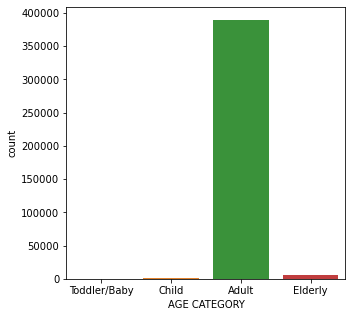

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(data['AGE CATEGORY'])
plt.show()

People in age group 17-64 years consume the most drug.

<AxesSubplot:xlabel='AGE CATEGORY', ylabel='count'>

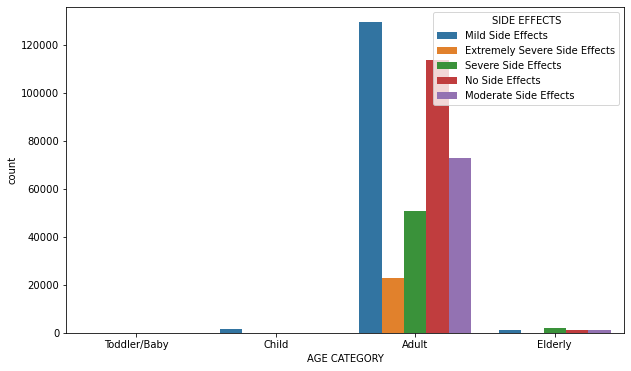

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE CATEGORY',hue='SIDE EFFECTS',data=data)

Mild side effect followed to No sild effect for people in age group 17-64 years

# SIDE EFFECTS

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mild Side Effects'),
  Text(1, 0, 'Extremely Severe Side Effects'),
  Text(2, 0, 'Severe Side Effects'),
  Text(3, 0, 'No Side Effects'),
  Text(4, 0, 'Moderate Side Effects')])

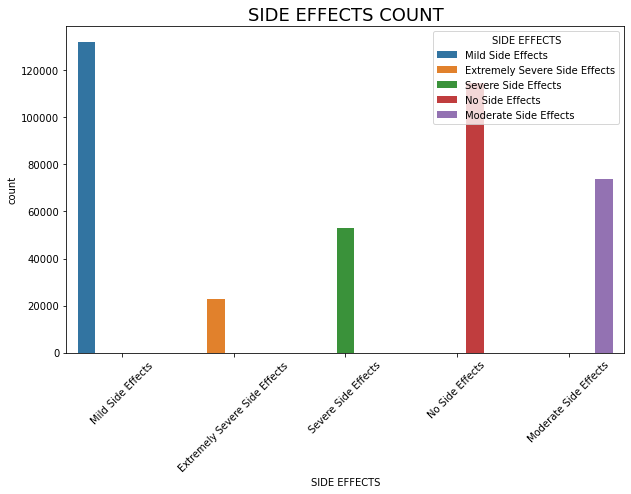

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='SIDE EFFECTS',hue='SIDE EFFECTS',data=data)
plt.title("SIDE EFFECTS COUNT",fontsize=18 )
plt.xticks(rotation=45)

Inference


According to the "side effects" count, Mild Side Effects are top most side effects which found basis of the EDA on this Side effects column

# GENDER VS SIDE EFFECT

<Figure size 3600x2880 with 0 Axes>

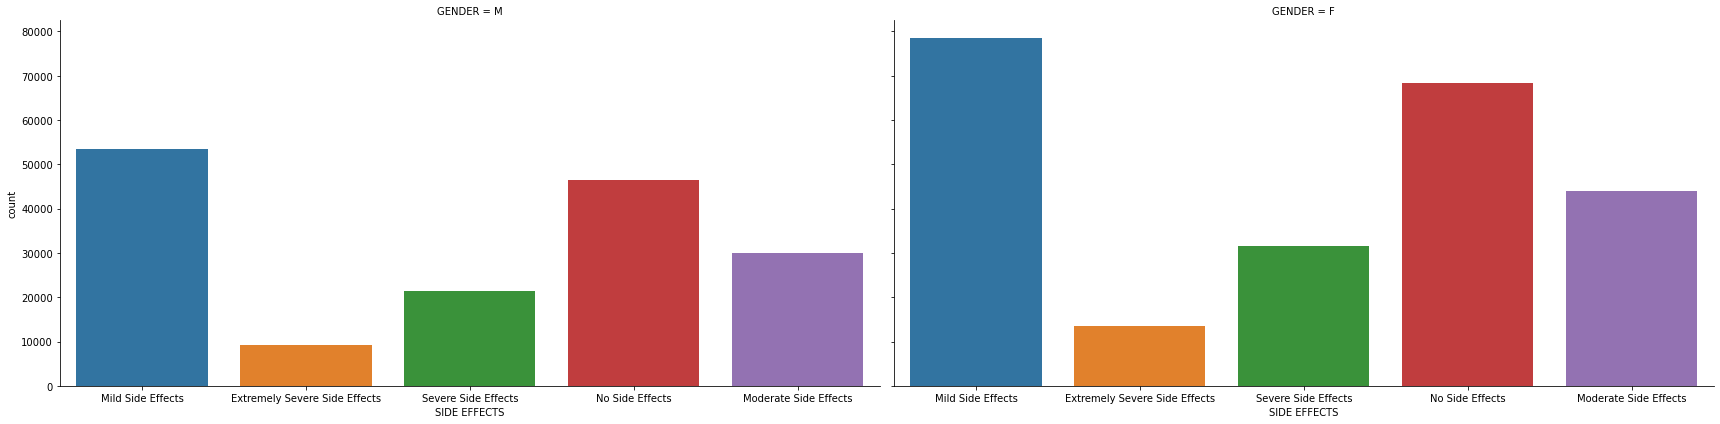

In [45]:
plt.figure(figsize=(50,40))

g = sns.catplot(x="SIDE EFFECTS",col="GENDER",data=data, kind="count",height=6,aspect =2);

Female has the slight more side effect as compared to  male and the side effect is mild followed by no side effect

# RACE VS SIDE EFFECT

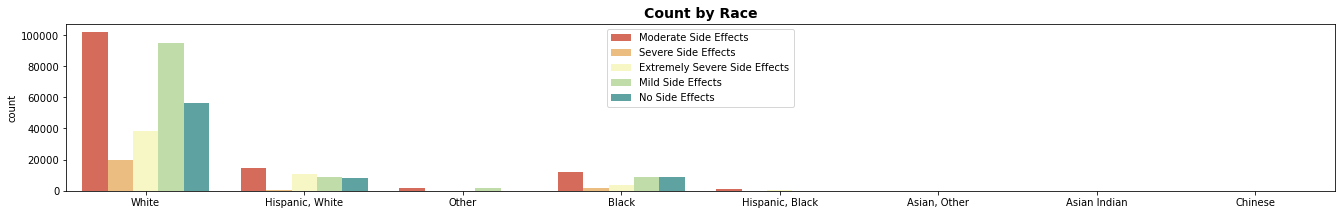

In [46]:
# Gender: Bar Charts
import matplotlib.gridspec as gridspec
f, ax = plt.subplots(figsize=(50, 40))
gs = gridspec.GridSpec(11, 2)
ax = plt.subplot(gs[0,0])
sns.countplot(data['RACE'], hue=data['SIDE EFFECTS'], ax=ax, palette = 'Spectral')
ax.set_title('Count by Race', fontweight="bold", fontsize=14)
ax.set_xlabel("")
ax.set_xticklabels(labels=['White', 'Hispanic, White', 'Other', 'Black', 'Hispanic, Black',
       'Asian, Other', 'Asian Indian', 'Chinese'])
ax.legend(['Moderate Side Effects','Severe Side Effects','Extremely Severe Side Effects','Mild Side Effects','No Side Effects'])

White people has high side effect compared to other race

In [47]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME','AGE CATEGORY'], axis = 1)
data.head(3)

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41,White,Mild Side Effects
1,M,zocor,53,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31,White,Mild Side Effects


# Label Encodding

In [48]:
df=data.copy()

In [49]:
from sklearn.preprocessing import LabelEncoder

cols = []
for i in df.columns:
    if df[i].dtype == 'object':
        cols.append(i)

labelencoder = LabelEncoder()
mapping =[]
for i in cols:
    df[i] = labelencoder.fit_transform(df[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)

print(f"Mapped labels of the features in data01 are {mapping}")

Mapped labels of the features in data01 are [{'F': 0, 'M': 1}, {'abilify': 0, 'accolate': 1, 'accupril': 2, 'accutane': 3, 'aciphex': 4, 'actiq': 5, 'actonel': 6, 'actos': 7, 'acyclovir': 8, 'aczone': 9, 'adcirca': 10, 'adderall': 11, 'adderall-xr': 12, 'adipex-p': 13, 'advair-diskus': 14, 'advair-hfa': 15, 'albuterol': 16, 'aldactone': 17, 'aldara': 18, 'alendronate': 19, 'alesse': 20, 'allegra': 21, 'allegra-d': 22, 'aloprim': 23, 'alprazolam': 24, 'ambien': 25, 'ambien-cr': 26, 'amerge': 27, 'amitiza': 28, 'amoxil': 29, 'amphetamine': 30, 'ampicillin': 31, 'anafranil': 32, 'androgel': 33, 'angeliq': 34, 'antivert': 35, 'aralen': 36, 'arava': 37, 'aricept': 38, 'arimidex': 39, 'armour-thyroid': 40, 'aromasin': 41, 'arthrotec': 42, 'asacol': 43, 'asmanex': 44, 'atacand': 45, 'atarax': 46, 'atenolol': 47, 'ativan': 48, 'atripla': 49, 'augmentin': 50, 'avage': 51, 'avapro': 52, 'avelox': 53, 'avita': 54, 'avodart': 55, 'axert': 56, 'aygestin': 57, 'azasan': 58, 'azelex': 59, 'azopt': 60

In [50]:
df

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,1,435,41,7,1
1,1,491,53,5,0
2,0,425,31,7,1
3,0,470,44,7,4
4,1,439,24,7,3
...,...,...,...,...,...
399995,1,231,50,7,4
399996,1,227,55,5,3
399997,1,90,57,6,4
399998,0,493,59,7,3


# Correlation Heatmap

In [51]:
df

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,1,435,41,7,1
1,1,491,53,5,0
2,0,425,31,7,1
3,0,470,44,7,4
4,1,439,24,7,3
...,...,...,...,...,...
399995,1,231,50,7,4
399996,1,227,55,5,3
399997,1,90,57,6,4
399998,0,493,59,7,3


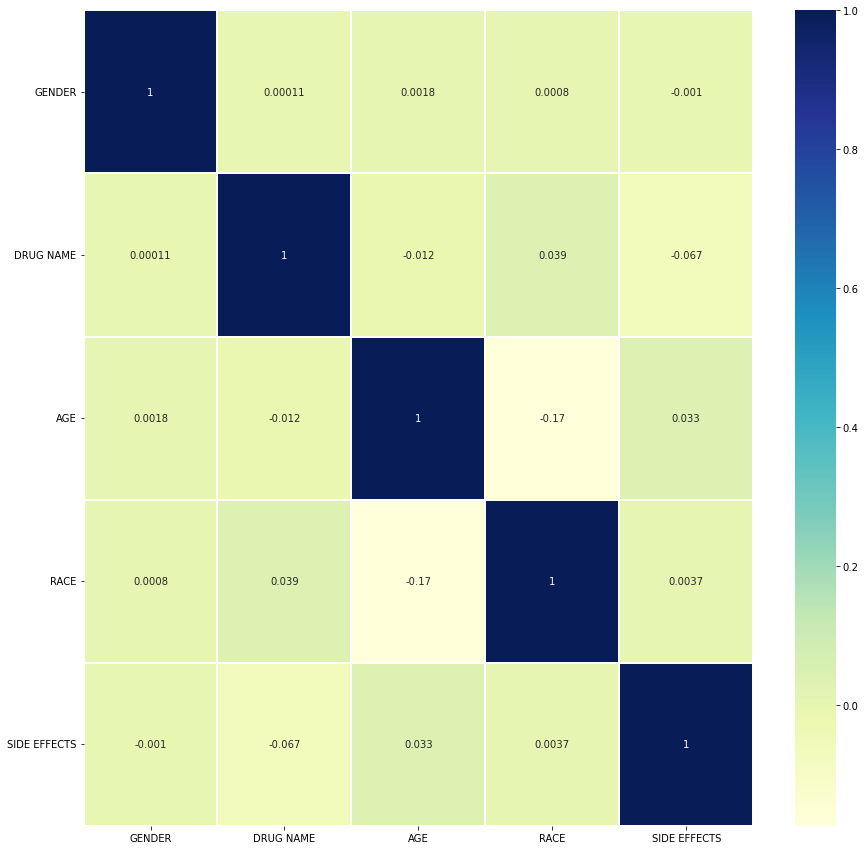

In [52]:
# Create the correlation heatmap 
corrmatrix=df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Training the models

In [53]:
# Splitting the Dataframe
# Independent variables
from sklearn.model_selection import train_test_split
X = df.drop(['SIDE EFFECTS'], axis=1)
# Dependent variables
y = df['SIDE EFFECTS']

In [54]:
y.value_counts(normalize=True)

1    0.333243
3    0.289430
2    0.186234
4    0.133521
0    0.057572
Name: SIDE EFFECTS, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [56]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (257666, 4)
Shape of X_test:  (138744, 4)
Shape of y_train:  (257666,)
Shape of y_test:  (138744,)


In [57]:
# importing necessary libraries to get the test results

from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score, classification_report


In [58]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='micro').round(4))


    

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7891
           1       0.33      0.97      0.50     46166
           2       0.00      0.00      0.00     26026
           3       0.41      0.04      0.07     40171
           4       0.42      0.00      0.00     18490

    accuracy                           0.34    138744
   macro avg       0.23      0.20      0.11    138744
weighted avg       0.28      0.34      0.19    138744

Accuracy Score:  0.3352
F1 Score:  0.3352
Precision Score:  0.3352
Recall Score:  0.3352


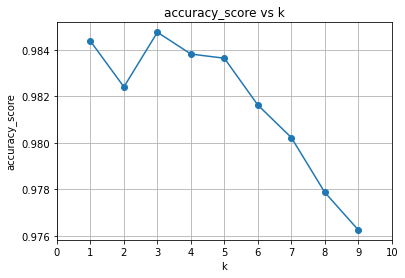

In [60]:
#kNN

# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(0.0, 11.0, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

In [61]:
# performing test with k=5

clf=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='micro').round(4))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7891
           1       0.98      0.99      0.98     46166
           2       0.98      0.98      0.98     26026
           3       0.99      0.99      0.99     40171
           4       0.99      0.99      0.99     18490

    accuracy                           0.98    138744
   macro avg       0.98      0.98      0.98    138744
weighted avg       0.98      0.98      0.98    138744

Accuracy Score:  0.9836
F1 Score:  0.9836
Precision Score:  0.9836
Recall Score:  0.9836


# RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='micro').round(4))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7891
           1       0.98      0.99      0.99     46166
           2       0.98      0.98      0.98     26026
           3       0.99      0.99      0.99     40171
           4       0.99      0.99      0.99     18490

    accuracy                           0.99    138744
   macro avg       0.98      0.98      0.98    138744
weighted avg       0.99      0.99      0.99    138744

Accuracy Score:  0.9853
F1 Score:  0.9853
Precision Score:  0.9853
Recall Score:  0.9853


# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='micro').round(4))


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      7891
           1       0.75      0.85      0.80     46166
           2       0.87      0.67      0.76     26026
           3       0.78      0.88      0.83     40171
           4       0.91      0.68      0.78     18490

    accuracy                           0.80    138744
   macro avg       0.84      0.77      0.79    138744
weighted avg       0.81      0.80      0.80    138744

Accuracy Score:  0.7978
F1 Score:  0.7978
Precision Score:  0.7978
Recall Score:  0.7978


# Xtreme Gradient Boosting Classifier

In [64]:
import xgboost as xgb

clf = xgb.XGBClassifier(use_label_encoder =False)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred, average='micro').round(4))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7891
           1       0.96      0.97      0.96     46166
           2       0.96      0.96      0.96     26026
           3       0.97      0.96      0.97     40171
           4       0.98      0.96      0.97     18490

    accuracy                           0.96    138744
   macro avg       0.96      0.96      0.96    138744
weighted avg       0.96      0.96      0.96    138744

Accuracy Score:  0.9643
F1 Score:  0.9643
Precision Score:  0.9643
Recall Score:  0.9643


# Decision Tree

In [59]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()

classifier_dt.fit(X_train, y_train)

y_pred_dt = classifier_dt.predict(X_test)
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_dt))
# print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred_dt).round(4))
print('F1 Score: ',f1_score(y_test, y_pred_dt, average='micro').round(4))
print('Precision Score: ',precision_score(y_test, y_pred_dt,average='micro').round(4))
print('Recall Score: ',recall_score(y_test, y_pred_dt, average='micro').round(4))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7891
           1       0.98      0.99      0.99     46166
           2       0.98      0.98      0.98     26026
           3       0.99      0.99      0.99     40171
           4       0.99      0.99      0.99     18490

    accuracy                           0.99    138744
   macro avg       0.98      0.98      0.98    138744
weighted avg       0.99      0.99      0.99    138744

Accuracy Score:  0.9862
F1 Score:  0.9862
Precision Score:  0.9862
Recall Score:  0.9862


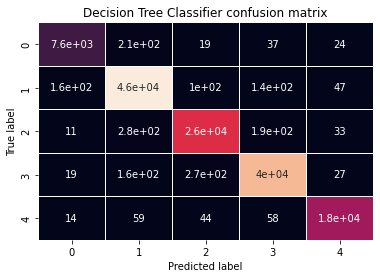

In [66]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

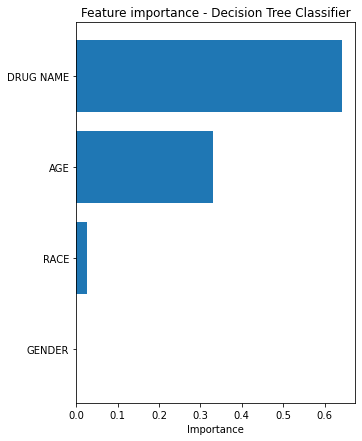

In [67]:
features_list = X.columns.values
feature_importance = classifier_dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance - Decision Tree Classifier')
plt.draw()
plt.show()

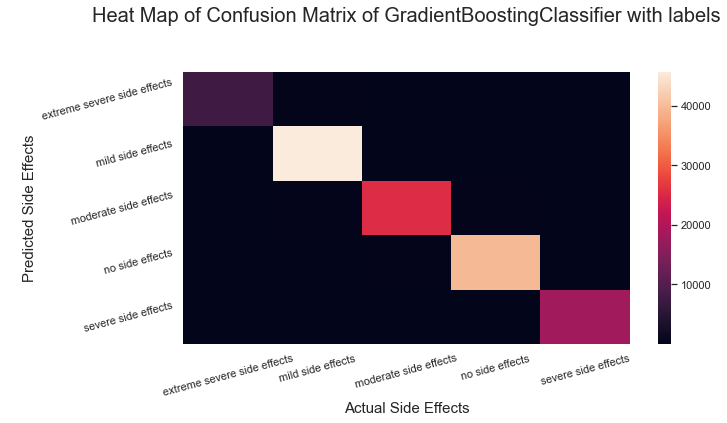

In [68]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred_dt)
sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.heatmap(cm)

ax.set_title('Heat Map of Confusion Matrix of GradientBoostingClassifier with labels\n\n', fontsize = 20);
ax.set_xlabel('Actual Side Effects',  fontsize = 15);
ax.set_ylabel('\nPredicted Side Effects',  fontsize = 15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['extreme severe side effects','mild side effects','moderate side effects','no side effects','severe side effects'])
ax.yaxis.set_ticklabels(['extreme severe side effects','mild side effects','moderate side effects','no side effects','severe side effects'])
plt.xticks(rotation=15)
plt.yticks(rotation=15)
## Display the visualization of the Confusion Matrix.
plt.show()
